In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings("ignore")


# data importing and reading

In [2]:
data=pd.read_csv('honey_purity_dataset.csv')
data

CS  Density     WC    pH    EC      F      G Pollen_analysis  \
0       2.81     1.75  23.04  6.29  0.76  39.02  33.63       Blueberry   
1       9.47     1.82  17.50  7.20  0.71  38.15  34.41         Alfalfa   
2       4.61     1.84  23.72  7.31  0.80  27.47  34.36        Chestnut   
3       1.77     1.40  16.61  4.01  0.78  31.52  28.15       Blueberry   
4       6.11     1.25  19.63  4.82  0.90  29.65  42.52         Alfalfa   
...      ...      ...    ...   ...   ...    ...    ...             ...   
247898  1.98     1.29  17.90  4.82  0.89  36.10  34.69        Rosemary   
247899  6.18     1.67  19.54  4.91  0.85  31.15  20.82          Acacia   
247900  7.78     1.49  15.78  5.69  0.73  44.60  44.07        Chestnut   
247901  5.78     1.74  14.96  6.81  0.83  47.19  37.79         Avocado   
247902  8.96     1.86  18.62  6.89  0.86  25.94  42.88        Lavender   

        Viscosity  Purity   Price  
0         4844.50    0.68  645.24  
1         6689.02    0.89  385.85  
2         6883.60    0.66  639.64  
3         7167.56    1.00  946.46  
4         5125.44    1.00  432.62  
...           ...     ...     ...  
247898    8261.63    1.00  754.98  
247899    6939.39    1.00  543.41  
247900    4139.79    0.64  615.46  
247901    4417.74    0.97  949.32  
247902    8119.62    0.64  384.48  

[247903 rows x 11 columns]

#  handling missing values

In [3]:
data.shape

(247903, 11)

In [4]:
data.head()

CS  Density     WC    pH    EC      F      G Pollen_analysis  Viscosity  \
0  2.81     1.75  23.04  6.29  0.76  39.02  33.63       Blueberry    4844.50   
1  9.47     1.82  17.50  7.20  0.71  38.15  34.41         Alfalfa    6689.02   
2  4.61     1.84  23.72  7.31  0.80  27.47  34.36        Chestnut    6883.60   
3  1.77     1.40  16.61  4.01  0.78  31.52  28.15       Blueberry    7167.56   
4  6.11     1.25  19.63  4.82  0.90  29.65  42.52         Alfalfa    5125.44   

   Purity   Price  
0    0.68  645.24  
1    0.89  385.85  
2    0.66  639.64  
3    1.00  946.46  
4    1.00  432.62

In [5]:
data.tail()

CS  Density     WC    pH    EC      F      G Pollen_analysis  \
247898  1.98     1.29  17.90  4.82  0.89  36.10  34.69        Rosemary   
247899  6.18     1.67  19.54  4.91  0.85  31.15  20.82          Acacia   
247900  7.78     1.49  15.78  5.69  0.73  44.60  44.07        Chestnut   
247901  5.78     1.74  14.96  6.81  0.83  47.19  37.79         Avocado   
247902  8.96     1.86  18.62  6.89  0.86  25.94  42.88        Lavender   

        Viscosity  Purity   Price  
247898    8261.63    1.00  754.98  
247899    6939.39    1.00  543.41  
247900    4139.79    0.64  615.46  
247901    4417.74    0.97  949.32  
247902    8119.62    0.64  384.48

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  object 
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


### Handling Categorical values

In [5]:
encoder = LabelEncoder()

data['Pollen_analysis'] = encoder.fit_transform(data['Pollen_analysis'])

print(data)


          CS  Density     WC    pH    EC      F      G  Pollen_analysis  \
0       2.81     1.75  23.04  6.29  0.76  39.02  33.63                3   
1       9.47     1.82  17.50  7.20  0.71  38.15  34.41                1   
2       4.61     1.84  23.72  7.31  0.80  27.47  34.36                6   
3       1.77     1.40  16.61  4.01  0.78  31.52  28.15                3   
4       6.11     1.25  19.63  4.82  0.90  29.65  42.52                1   
...      ...      ...    ...   ...   ...    ...    ...              ...   
247898  1.98     1.29  17.90  4.82  0.89  36.10  34.69               13   
247899  6.18     1.67  19.54  4.91  0.85  31.15  20.82                0   
247900  7.78     1.49  15.78  5.69  0.73  44.60  44.07                6   
247901  5.78     1.74  14.96  6.81  0.83  47.19  37.79                2   
247902  8.96     1.86  18.62  6.89  0.86  25.94  42.88               10   

        Viscosity  Purity   Price  
0         4844.50    0.68  645.24  
1         6689.02    0.89  

# checking null values

In [8]:
data.isnull().sum()

CS                 0
Density            0
WC                 0
pH                 0
EC                 0
F                  0
G                  0
Pollen_analysis    0
Viscosity          0
Purity             0
Price              0
dtype: int64

# descriptive analysis

In [9]:
data.describe()

CS        Density             WC             pH  \
count  247903.000000  247903.000000  247903.000000  247903.000000   
mean        5.500259       1.535523      18.502625       4.996047   
std         2.593947       0.187824       3.748635       1.444060   
min         1.000000       1.210000      12.000000       2.500000   
25%         3.260000       1.370000      15.260000       3.750000   
50%         5.500000       1.540000      18.510000       4.990000   
75%         7.740000       1.700000      21.750000       6.250000   
max        10.000000       1.860000      25.000000       7.500000   

                  EC              F              G  Pollen_analysis  \
count  247903.000000  247903.000000  247903.000000    247903.000000   
mean        0.799974      34.970573      32.501006         8.993618   
std         0.057911       8.655898       7.226290         5.473649   
min         0.700000      20.000000      20.000000         0.000000   
25%         0.750000      27.460000      26.230000         4.000000   
50%         0.800000      34.970000      32.490000         9.000000   
75%         0.850000      42.470000      38.760000        14.000000   
max         0.900000      50.000000      45.000000        18.000000   

           Viscosity         Purity          Price  
count  247903.000000  247903.000000  247903.000000  
mean     5752.893888       0.824471     594.807644  
std      2455.739903       0.139417     233.627972  
min      1500.050000       0.610000     128.720000  
25%      3627.880000       0.660000     433.000000  
50%      5753.770000       0.820000     612.960000  
75%      7886.650000       0.970000     770.220000  
max      9999.970000       1.000000     976.690000

# visual analysis / finding outliers

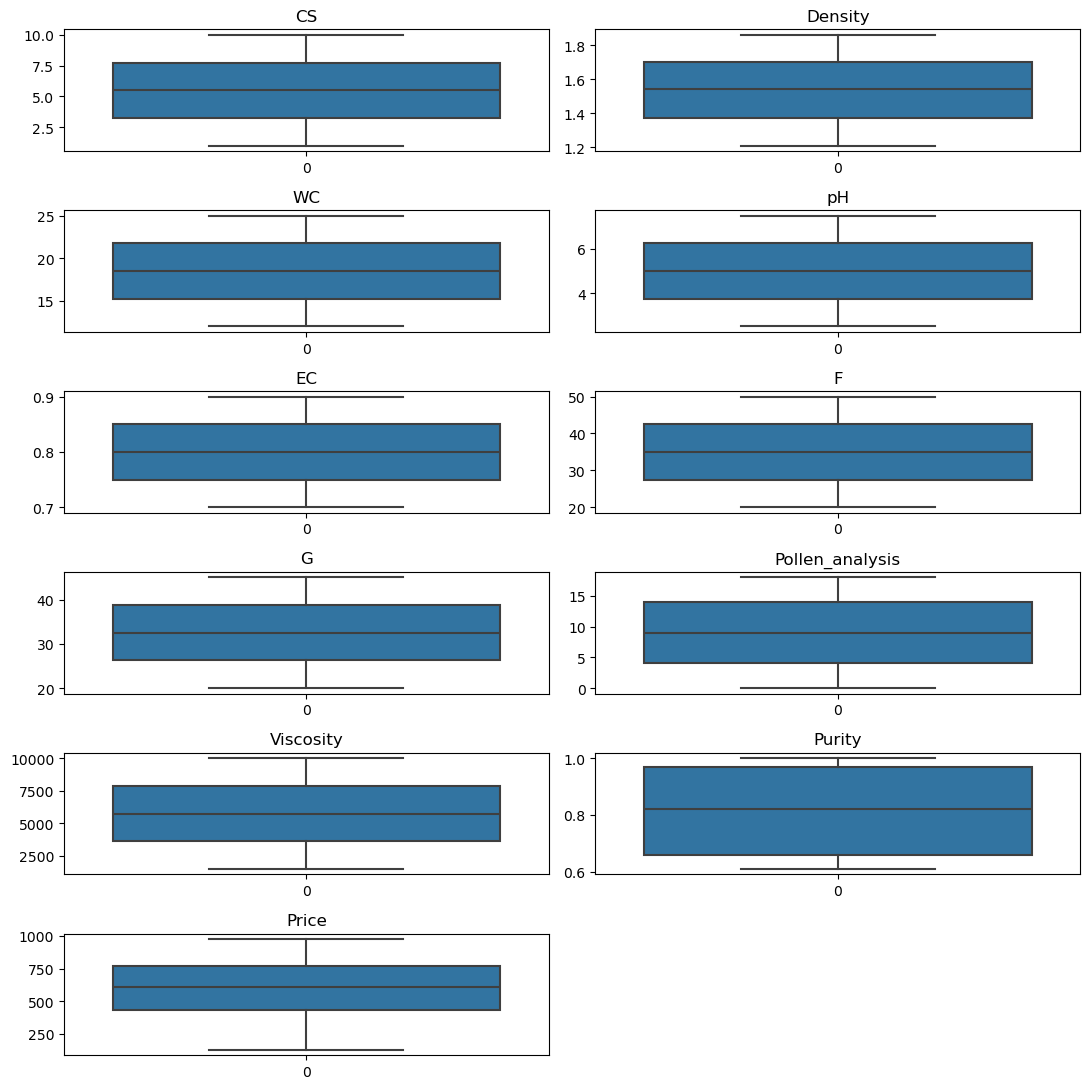

In [10]:
plt.figure(figsize=(11,11))
for i,col in enumerate(data.columns):
    plt.subplot(6,2,i+1)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()

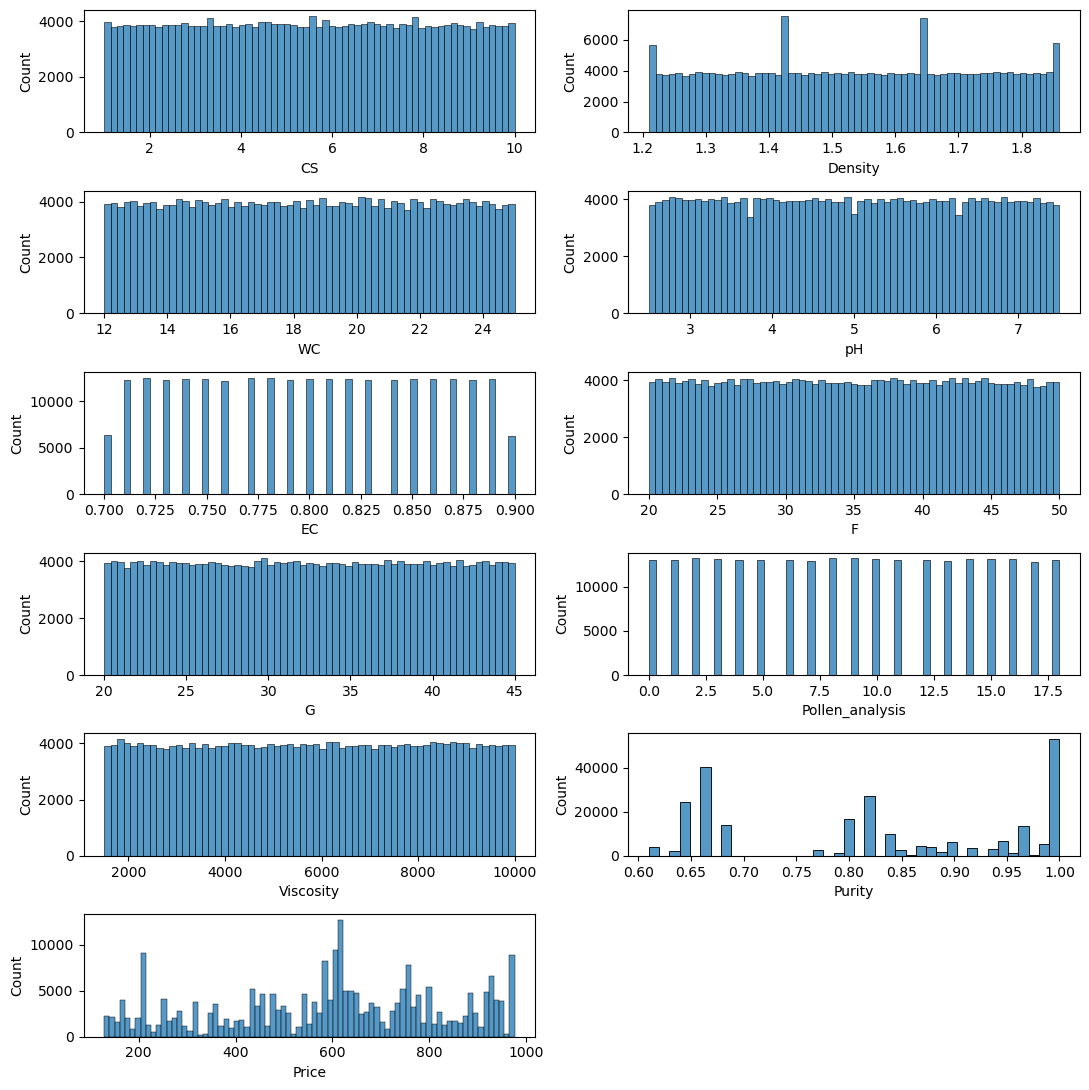

In [11]:
plt.figure(figsize=(11,11))
for i,col in enumerate(data.columns):
    plt.subplot(6,2,i+1)
    sns.histplot(data[col])
plt.tight_layout()

# univariate analysis

array([<Axes: ylabel='count'>], dtype=object)

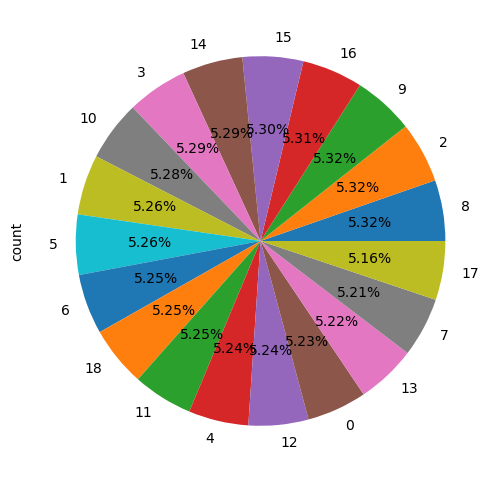

In [12]:
plt.figure(figsize=(6,6))
data["Pollen_analysis"].value_counts().plot(kind="pie",subplots=True,autopct="%1.2f%%")

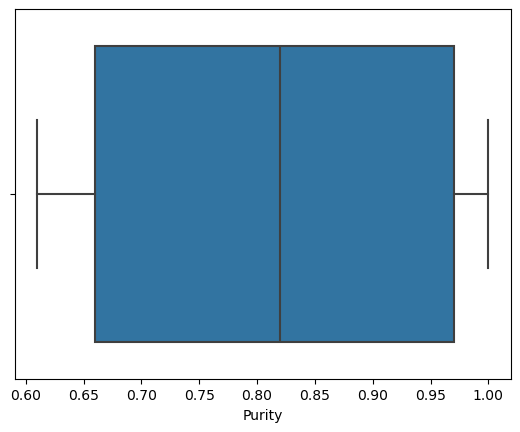

In [13]:
sns.boxplot(x="Purity",data=data)
plt.show()

# Bivariate analysis

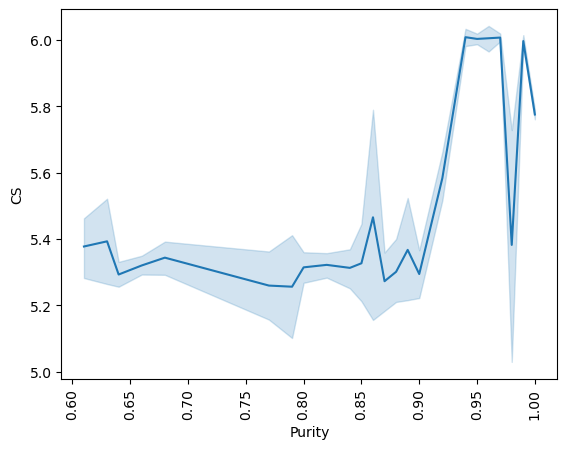

In [14]:
sns.lineplot(y="CS",x="Purity",data=data)
plt.xticks(rotation=90)
plt.show()

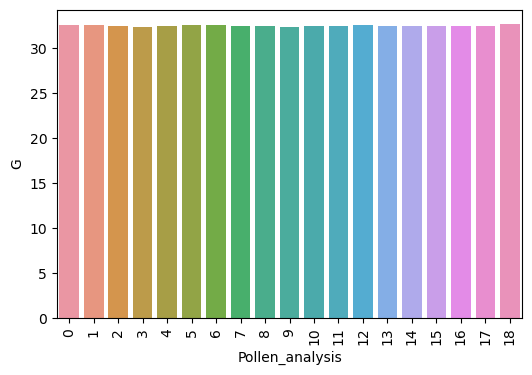

In [15]:
plt.figure(figsize=(6,4))
sns.barplot(y="G",x="Pollen_analysis",data=data,ci=None)
plt.xticks(rotation=90)
plt.show()


# multivariate Analysis

<Figure size 1100x1100 with 0 Axes>

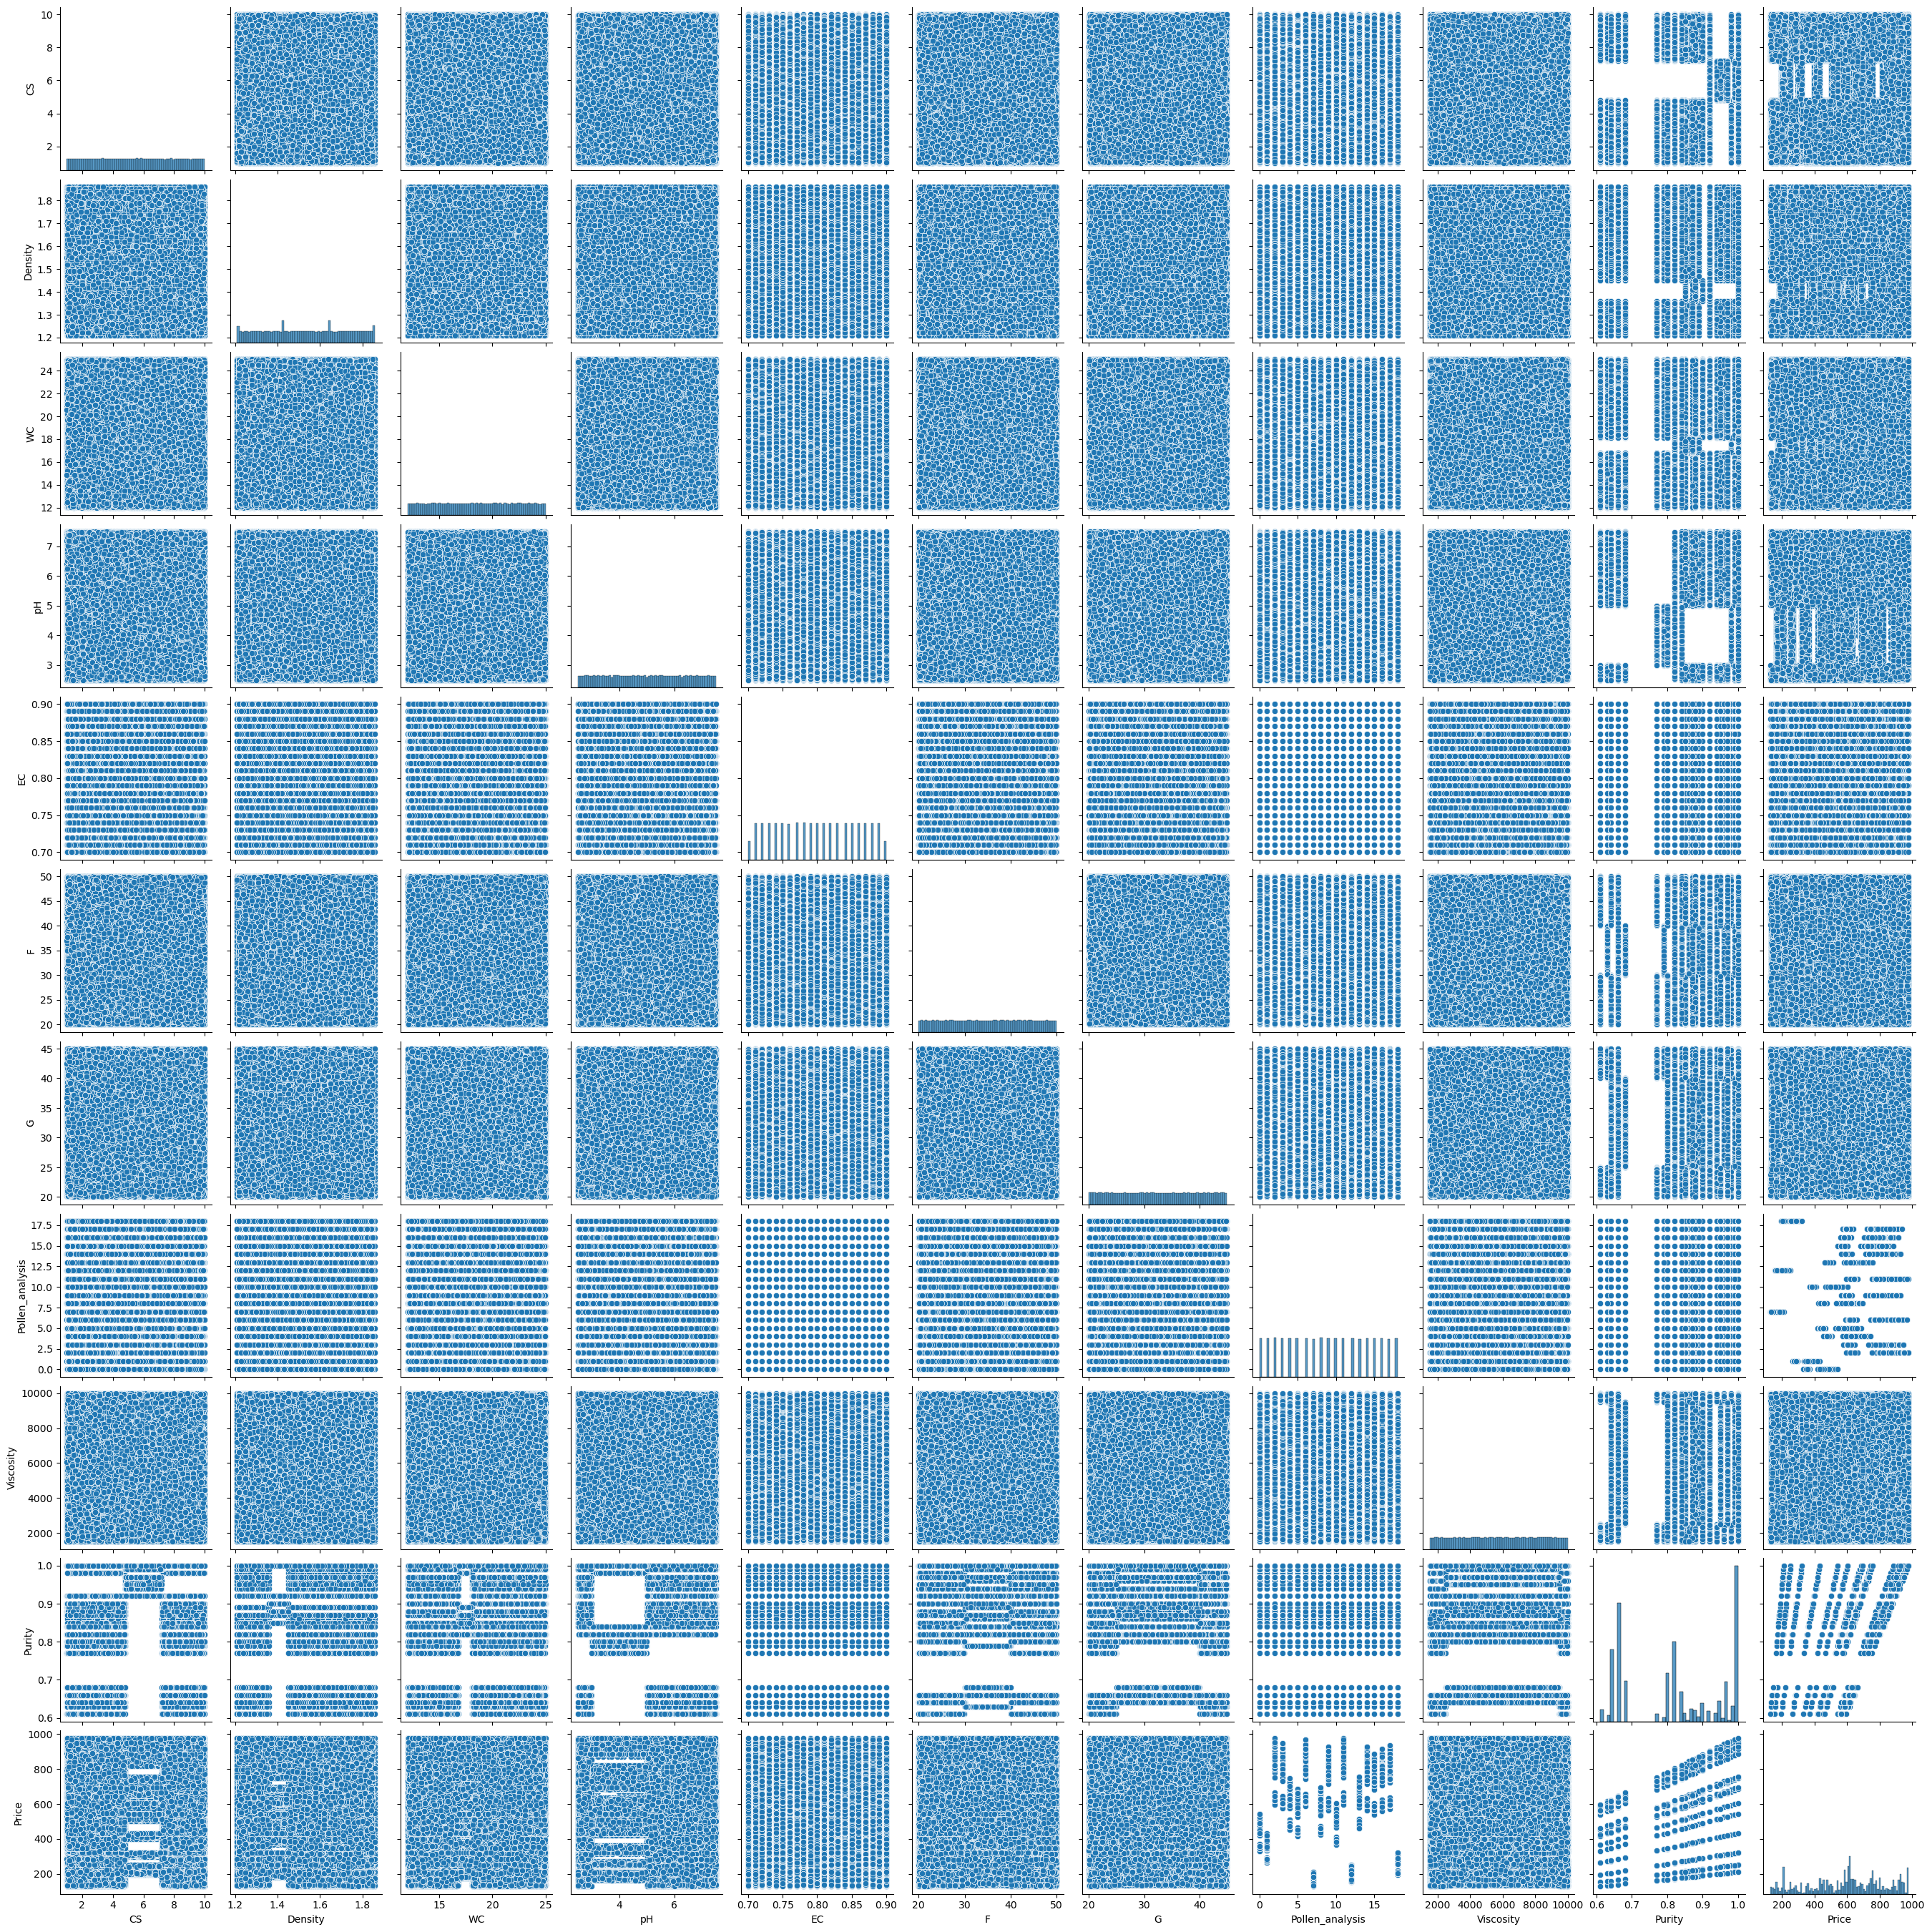

In [16]:

plt.figure(figsize=(11,11))
sns.pairplot(data)
plt.show()

In [17]:
data.corr()

CS   Density        WC        pH        EC         F  \
CS               1.000000 -0.001099  0.001148  0.000267 -0.000215 -0.003287   
Density         -0.001099  1.000000 -0.000037  0.002389 -0.004113  0.000515   
WC               0.001148 -0.000037  1.000000  0.001068  0.000690  0.000912   
pH               0.000267  0.002389  0.001068  1.000000 -0.001400  0.000511   
EC              -0.000215 -0.004113  0.000690 -0.001400  1.000000 -0.001773   
F               -0.003287  0.000515  0.000912  0.000511 -0.001773  1.000000   
G                0.001217  0.002244  0.003517 -0.000725 -0.002520 -0.000683   
Pollen_analysis -0.002789  0.000047  0.000793 -0.001706  0.002786 -0.003072   
Viscosity       -0.000099 -0.003295 -0.001088 -0.002347 -0.001755 -0.000023   
Purity           0.079770 -0.108834 -0.028894 -0.230855  0.000151 -0.001149   
Price            0.035166 -0.050518 -0.014381 -0.100714 -0.000571 -0.002041   

                        G  Pollen_analysis  Viscosity    Purity     Price  
CS               0.001217        -0.002789  -0.000099  0.079770  0.035166  
Density          0.002244         0.000047  -0.003295 -0.108834 -0.050518  
WC               0.003517         0.000793  -0.001088 -0.028894 -0.014381  
pH              -0.000725        -0.001706  -0.002347 -0.230855 -0.100714  
EC              -0.002520         0.002786  -0.001755  0.000151 -0.000571  
F               -0.000683        -0.003072  -0.000023 -0.001149 -0.002041  
G                1.000000        -0.001094   0.000453  0.000059 -0.004815  
Pollen_analysis -0.001094         1.000000  -0.001733  0.003305  0.058498  
Viscosity        0.000453        -0.001733   1.000000  0.012572  0.009632  
Purity           0.000059         0.003305   0.012572  1.000000  0.432581  
Price           -0.004815         0.058498   0.009632  0.432581  1.000000

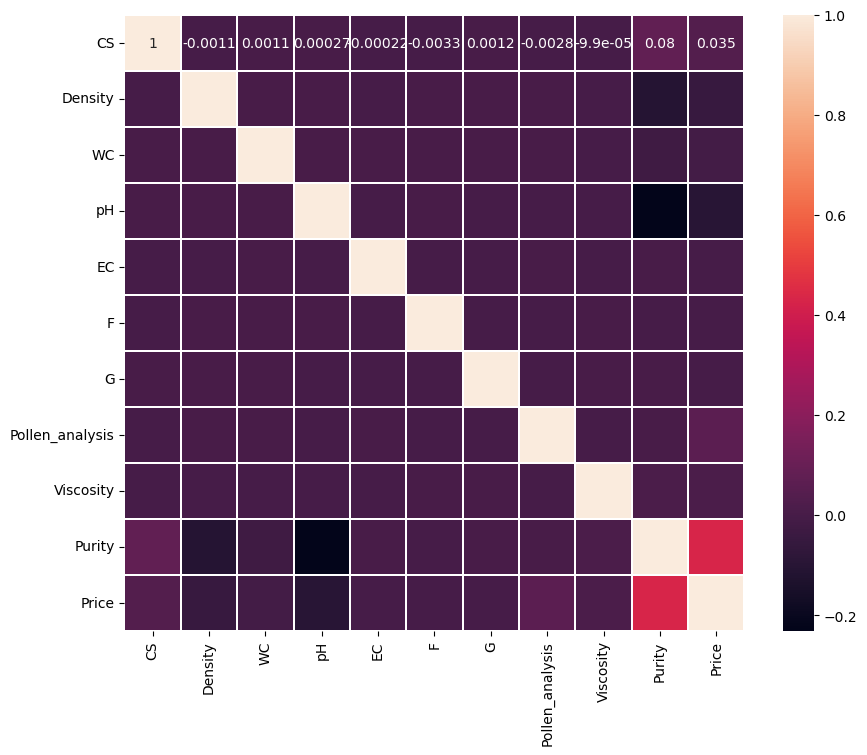

In [18]:
sns.heatmap(data.corr(), annot = True, linewidths= 0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

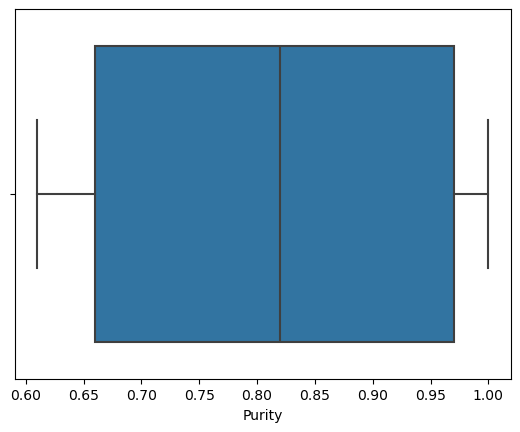

In [19]:
sns.boxplot(x="Purity",data=data)
plt.show()
            

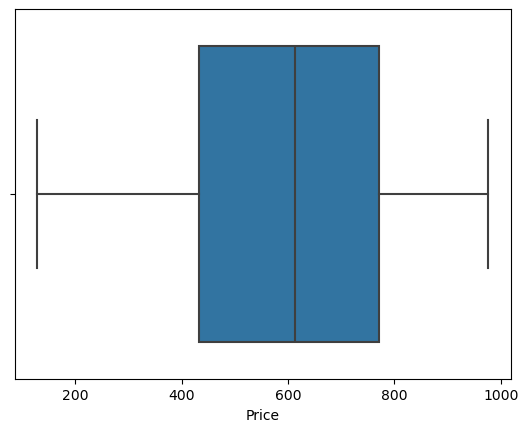

In [20]:
sns.boxplot(x="Price",data=data)
plt.show()


In [6]:
x=data.drop(["Price"],axis=1)
y=data["Price"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

In [7]:
sts=StandardScaler()
xtrain=sts.fit_transform(xtrain)
xtest=sts.transform(xtest)

###  Linear Regression model

In [23]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
print(ypred)
print("training accuracy",lr.score(xtrain,ytrain))
print("testing accuracu",lr.score(xtest,ytest))
mse=mean_squared_error(ypred,ytest)
print("mean squared error:",mse)
r2_lr=r2_score(ypred,ytest)
print("r2 score",r2_lr)


[704.66490019 461.9722937  731.88227169 ... 460.51045169 513.20263708
 609.95242294]
training accuracy 0.18924656267633866
testing accuracu 0.1951221617711716
mean squared error: 43985.58793110899
r2 score -3.2814933916061033


## Decision tree model

In [24]:
dt=DecisionTreeRegressor()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print(ypred)
print("training accuracy",dt.score(xtrain,ytrain))
print("testing accuracu",dt.score(xtest,ytest))
mse=mean_squared_error(ypred,ytest)
print("mean squared error:",mse)
r2_dt=r2_score(ypred,ytest)
print("r2 score",r2_dt)


[946.46 621.56 926.3  ... 626.3  219.42 825.17]
training accuracy 1.0
testing accuracu 0.9999996378442584
mean squared error: 0.01979136766100429
r2 score 0.9999996378446946


### Random Forest Regressor

In [25]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print(ypred)
print("training accuracy",rf.score(xtrain,ytrain))
print("testing accuracu",rf.score(xtest,ytest))
mse=mean_squared_error(ypred,ytest)
print("mean squared error:",mse)
r2_rf=r2_score(ypred,ytest)
print("r2 score",r2_rf)


[946.46   621.56   926.3    ... 626.3    219.42   825.0917]
training accuracy 0.999999955348806
testing accuracu 0.9999997275270402
mean squared error: 0.014890313488231902
r2 score 0.9999997275267476


## Comparing All The Models.


In [26]:
Accuracys =pd.DataFrame({"models":["LinearRegression","DecisionTree","RandomForestRegressor"],
                         "R2score":[r2_lr,r2_dt,r2_rf]})
Accuracys

models   R2score
0       LinearRegression -3.281493
1           DecisionTree  1.000000
2  RandomForestRegressor  1.000000

 ### Testing The Model

In [27]:
print(rf.predict(sts.transform([[6.78,1.22,14.84,3.5,0.83,41.63,26.52,0,7691.92,1.0]])))

[543.41]


In [28]:
print(rf.predict(sts.transform([[5.55,4.55,66.5,4,555.2,55.3,666.7,5,888.6,66.5,]])))

[684.45]


In [29]:
print(rf.predict(sts.transform([[6.56,4.54,67.5,4,545.2,54.3,454.7,4,77.4,0.12,]])))

[454.17]


In [30]:
print(rf.predict(sts.transform([[2.81,1.75,23.04,6.29,0.76,39.02,33.63,3,4844.5,0.68]])))

[645.24]


## Save And Load The Best Model


In [ ]:
import pickle
pickle.dump(rf,open("honmodel.pkl","wb"))